In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Verzeo July ML 2/Data/AdultIncome.csv')

In [4]:
df.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19787 non-null  int64 
 1   wc              19787 non-null  object
 2   education       19787 non-null  object
 3   marital status  19787 non-null  object
 4   race            19787 non-null  object
 5   gender          19787 non-null  object
 6   hours per week  19787 non-null  int64 
 7   IncomeClass     19787 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [6]:
df.describe()

,age,hours per week
count,19787.000000,19787.000000
mean,37.467378,40.938596
std,12.543376,10.991015
min,17.000000,1.000000
25%,27.000000,40.000000
50%,36.000000,40.000000
75%,46.000000,45.000000
max,90.000000,99.000000


In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
x.shape

(19787, 19)

In [11]:
x[2]

array([37, 40,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0])

In [12]:
y.shape

(19787,)

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_test.shape

(3958, 19)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(max_depth=5)

In [18]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_pred = dtc.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
accuracy_score(y_test, y_pred)

0.8173319858514401

In [22]:
confusion_matrix(y_test, y_pred)

array([[2582,  296],
       [ 427,  653]])

In [23]:
from sklearn import tree

[Text(167.4, 199.32, 'X[13] <= 0.5\ngini = 0.386\nsamples = 15829\nvalue = [11697, 4132]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 43.5\ngini = 0.122\nsamples = 8393\nvalue = [7845, 548]'),
 Text(41.85, 126.83999999999999, 'X[0] <= 33.5\ngini = 0.072\nsamples = 6648\nvalue = [6399, 249]'),
 Text(20.925, 90.6, 'X[0] <= 27.5\ngini = 0.022\nsamples = 3976\nvalue = [3931, 45]'),
 Text(10.4625, 54.359999999999985, 'X[7] <= 0.5\ngini = 0.009\nsamples = 2977\nvalue = [2963, 14]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.008\nsamples = 2937\nvalue = [2925, 12]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(31.387500000000003, 54.359999999999985, 'X[6] <= 0.5\ngini = 0.06\nsamples = 999\nvalue = [968, 31]'),
 Text(26.15625, 18.119999999999976, 'gini = 0.097\nsamples = 528\nvalue = [501, 27]'),
 Text(36.61875, 18.119999999999976, 'gini = 0.017\nsamples = 471\nvalue = [467, 4]'),
 Text(62.775000000000006, 90.6, 'X[6] <= 0.5\ngini = 0.

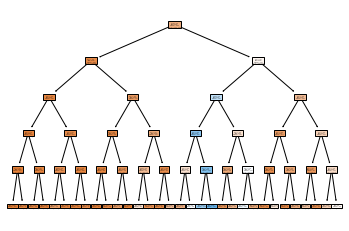

In [24]:
tree.plot_tree(dtc, filled= True)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(max_depth = 5)

In [27]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred1 = rf.predict(x_test)

In [29]:
accuracy_score(y_test, y_pred1)

0.8150581101566448

In [31]:
confusion_matrix(y_test, y_pred1)

array([[2721,  157],
       [ 575,  505]])